# Generate scattering profiles for different observatory sites
===================================================================================

- Sylvie Dagoret-Campagne
- affliliation : IJCLAB/IN2P3/CNRS
- creation date :  23 October 2023
- Last verification : October 23th 2023

===================================================================================

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
import numpy as np

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sns

In [4]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(12,6)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points 

In [5]:
from libradtranpy import libsimulateVisible

libradtranpath= /Users/dagoret/MacOSX/External/libRadtran/


In [1]:
from libradtranpy import Dict_Of_sitesPressures 

ImportError: cannot import name 'Dict_Of_sitesPressures' from 'libradtranpy' (/Users/dagoret/MacOSX/GitHub/LSST/AtmosphericSimulation/libradtranpy/src/libradtranpy/__init__.py)

In [2]:
# pressure calculated by libradtran
Dict_Of_sitesPressures = {'LSST':731.50433,
                          'CTIO':774.6052,
                          'OHP':937.22595,
                          'PDM':710.90637,
                          'OMK':600.17224,
                          'OSL':1013.000,
                        }

In [6]:
os.getenv('LIBRADTRANDIR')

'/Users/dagoret/MacOSX/External/libRadtran'

In [ ]:
hls_colors = sns.color_palette("hls", 10)
sns.palplot(hls_colors)

In [7]:
import sys
sys.path

['/Users/dagoret/MacOSX/GitHub/LSST/AtmosphericSimulation/libradtranpy/docs/notebooks/libradtranpy',
 '/Users/dagoret/anaconda3/lib/python311.zip',
 '/Users/dagoret/anaconda3/lib/python3.11',
 '/Users/dagoret/anaconda3/lib/python3.11/lib-dynload',
 '',
 '/Users/dagoret/anaconda3/lib/python3.11/site-packages',
 '/Users/dagoret/MacOSX/GitHub/LSST/AtmosphericSimulation/libradtranpy/src',
 '/Users/dagoret/anaconda3/lib/python3.11/site-packages/aeosa',
 '/Users/dagoret/MacOSX/GitHub/LSST/forecasting/firecrown',
 '/Users/dagoret/anaconda3/lib/python3.11/site-packages/Django-5.0a1-py3.11.egg',
 '/Users/dagoret/anaconda3/lib/python3.11/site-packages/sqlparse-0.4.4-py3.11.egg',
 '/Users/dagoret/anaconda3/lib/python3.11/site-packages/asgiref-3.7.2-py3.11.egg',
 '/Users/dagoret/anaconda3/lib/python3.11/site-packages/pyExtinction-1.0-py3.11.egg']

## Choose the parameters of the simulation

In [8]:
AMMIN=1
AMMAX=2.5
NAM = 16
am=np.linspace(AMMIN,AMMAX,NAM)
pressure = 0. # use default value
pwv=4       # turn on or of the pwv
aer=0  
ozone=0.    # turn on or of the ozone
cloudext=0

In [9]:
NBOBS=len(am)

In [10]:
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBOBS)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange( NBOBS), alpha=1)

## Simulation

In [11]:
all_trans = []
for index in np.arange(NBOBS):

    path,thefile=libsimulateVisible.ProcessSimulation(am[index],pwv,ozone,pressure,
                                                      prof_str='us',proc_str='sc',cloudext=cloudext)
    data = np.loadtxt(os.path.join(path,thefile))
    wl = data[:,0]
    atm = data[:,1] 
    all_trans.append(atm)

******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from  0.500000 to 0.500055
******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from  0.500000 to 0.500055
******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from  0.500000 to 0.500055
******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from  0.500000 to 0.500055
******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from  0.500000 to 0.500055
******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from  0.500000 to 0.500055
******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from 

## Plot

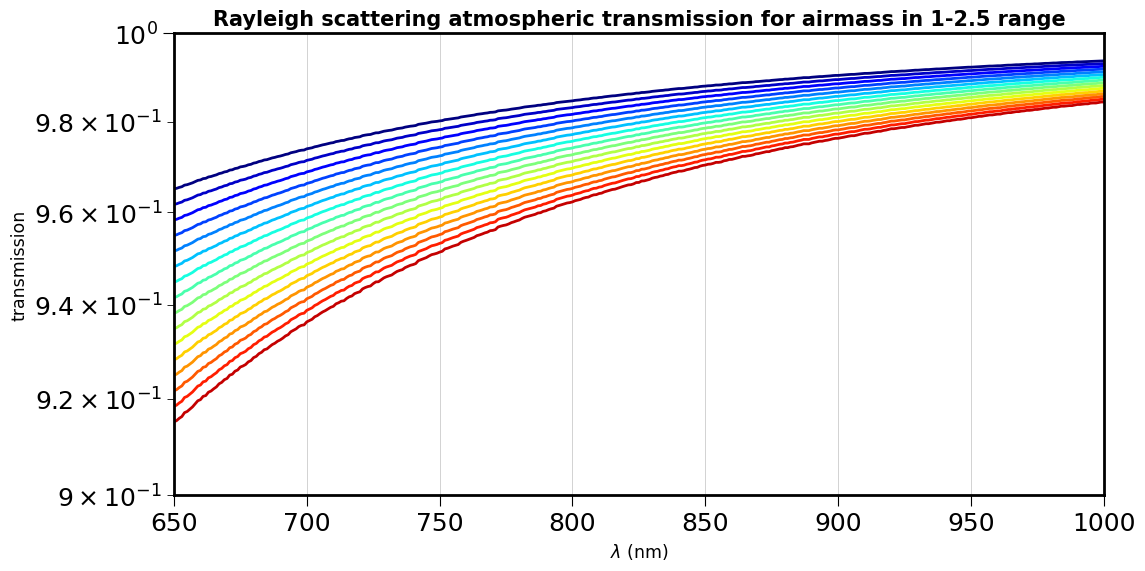

In [12]:
for index in np.arange(NBOBS):   
    plt.semilogy(wl,all_trans[index],'-',color=all_colors[index])
plt.xlim(650,1000)
plt.grid()
plt.title(f"Rayleigh scattering atmospheric transmission for airmass in {AMMIN}-{AMMAX} range")
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("transmission")
plt.ylim(0.9,1)
figname="multiscatttransmissionvsairmass_log.png"
plt.savefig(figname)

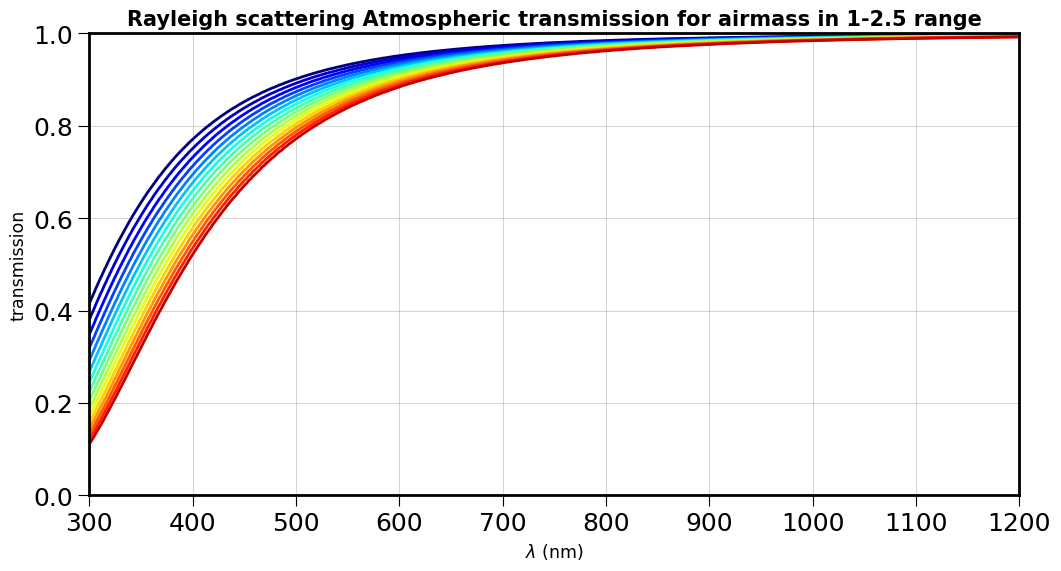

In [13]:
for index in np.arange(NBOBS):   
    plt.plot(wl,all_trans[index],'-',color=all_colors[index])
plt.xlim(300,1200)
plt.grid()
plt.title(f"Rayleigh scattering Atmospheric transmission for airmass in {AMMIN}-{AMMAX} range")
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("transmission")
plt.ylim(0.,1)
#plt.xlim(300,700)
figname="multiscatttransmissionvsairmass_lin.png"
plt.savefig(figname)